In [164]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [165]:
Car_price=pd.read_csv("car_price_prediction_with_missing.csv")
Car_price.head()

,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
0,1.0,Tesla,2016.0,2.3,Petrol,Manual,114832.0,New,26613.92,Model X
1,2.0,BMW,2018.0,4.4,Electric,Manual,143190.0,Used,14679.61,5 Series
2,3.0,Audi,2013.0,4.5,Electric,Manual,181601.0,New,44402.61,A4
3,4.0,Tesla,2011.0,4.1,Diesel,Automatic,68682.0,New,86374.33,Model Y
4,5.0,Ford,2009.0,2.6,Diesel,Manual,223009.0,Like New,73577.10,Mustang


In [166]:
Car_price.columns

Index(['Car ID', 'Brand', 'Year', 'Engine Size', 'Fuel Type', 'Transmission',
       'Mileage', 'Condition', 'Price', 'Model'],
      dtype='object')

In [168]:
Car_price["Transmission"].unique()

array(['Manual', 'Automatic', nan], dtype=object)

In [131]:
Car_price.columns=['car_ID', 'Brand', 'Year', 'Engine_Size', 'Fuel_type', 'Transmission', 'Mileage', 'condition', 'Price', 'Model']

## Data understanding

In [132]:
Car_price.shape

(2500, 10)

In [133]:
Car_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   car_ID        2250 non-null   float64
 1   Brand         2250 non-null   object 
 2   Year          2250 non-null   float64
 3   Engine_Size   2250 non-null   float64
 4   Fuel_type     2250 non-null   object 
 5   Transmission  2250 non-null   object 
 6   Mileage       2250 non-null   float64
 7   condition     2250 non-null   object 
 8   Price         2250 non-null   float64
 9   Model         2250 non-null   object 
dtypes: float64(5), object(5)
memory usage: 195.4+ KB


In [134]:
Car_price.describe().T

,count,mean,std,min,25%,50%,75%,max
car_ID,2250.0,1251.243556,725.637358,1.00,627.2500,1249.50,1875.25,2500.00
Year,2250.0,2011.577778,6.980468,2000.00,2005.0000,2012.00,2018.00,2023.00
Engine_Size,2250.0,3.485467,1.427690,1.00,2.3000,3.45,4.70,6.00
Mileage,2250.0,150236.178222,88150.746556,15.00,71178.5000,149762.00,226299.00,299967.00
Price,2250.0,52506.874391,27232.417079,5011.27,28985.0525,53485.24,75560.34,99982.59


In [135]:
Car_price.isna().sum()

car_ID          250
Brand           250
Year            250
Engine_Size     250
Fuel_type       250
Transmission    250
Mileage         250
condition       250
Price           250
Model           250
dtype: int64

In [136]:
Car_price.dropna(inplace=True)

In [137]:
Car_price.shape

(2250, 10)

In [138]:
Car_price.isna().sum()

car_ID          0
Brand           0
Year            0
Engine_Size     0
Fuel_type       0
Transmission    0
Mileage         0
condition       0
Price           0
Model           0
dtype: int64

## EDA

#### Univariate analysis

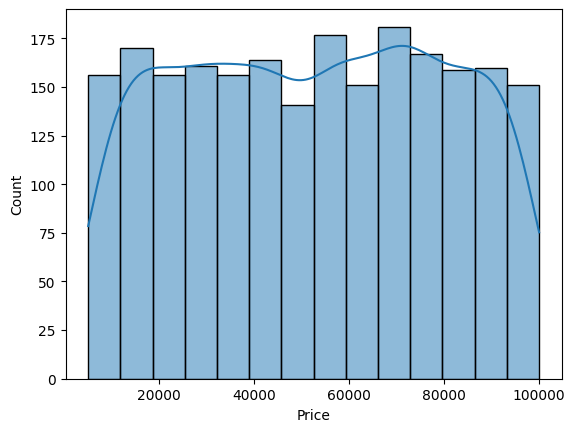

In [139]:
sns.histplot(Car_price['Price'],kde=True)
plt.show()

#### Multivariate analysis

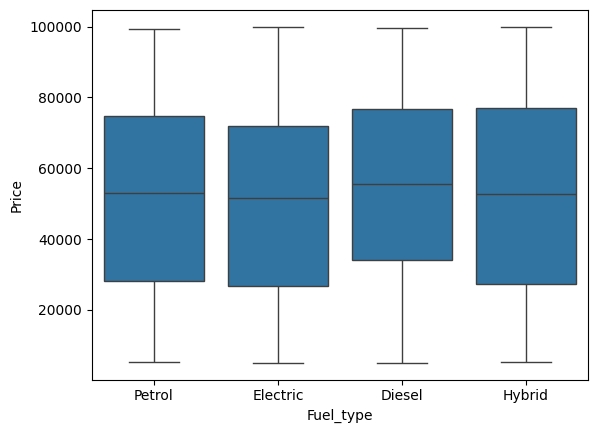

In [140]:
sns.boxplot(x='Fuel_type',y='Price',data=Car_price)
plt.show()

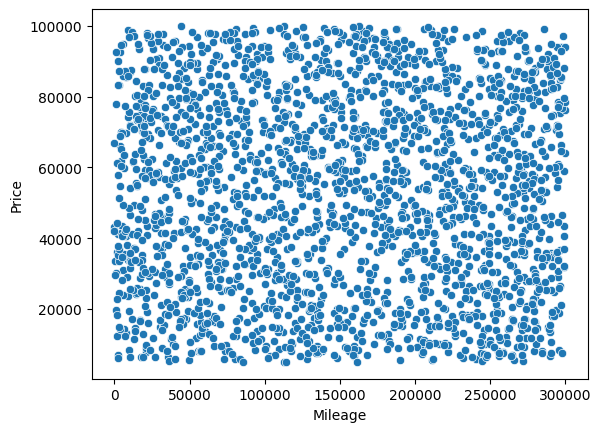

In [141]:
sns.scatterplot(x='Mileage',y='Price',data=Car_price)
plt.show()           ## this non-linear relationship

#### Correlation

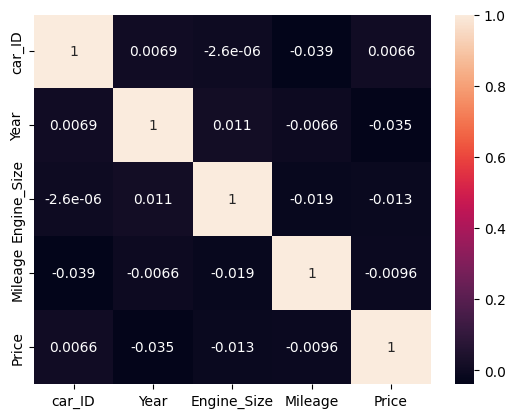

In [142]:
Car_price.corr(numeric_only=True)
sns.heatmap(Car_price.corr(numeric_only=True),annot=True)
plt.show()

# Feature Engineering

In [143]:
Car_price.drop('car_ID',axis=1,inplace=True)

In [144]:
Car_price['Car_age']=2026-Car_price['Year']

In [145]:
Car_price['Mileage_per_year']=Car_price['Mileage']/Car_price['Car_age']

# Outliers Handling

In [146]:
from sklearn.ensemble import IsolationForest

iso=IsolationForest(contamination=0.02,random_state=42)
outliers=iso.fit_predict(Car_price[['Mileage','Price','Engine_Size']])
Car_price=Car_price[outliers==1]

# Feature Encoding

In [147]:
from sklearn.preprocessing import OneHotEncoder
from category_encoders import TargetEncoder

In [148]:
## Split features
X=Car_price.drop("Price",axis=1)
y=Car_price["Price"]

In [149]:
X.shape

(2205, 10)

In [150]:
X.head()

,Brand,Year,Engine_Size,Fuel_type,Transmission,Mileage,condition,Model,Car_age,Mileage_per_year
0,Tesla,2016.0,2.3,Petrol,Manual,114832.0,New,Model X,10.0,11483.200000
1,BMW,2018.0,4.4,Electric,Manual,143190.0,Used,5 Series,8.0,17898.750000
2,Audi,2013.0,4.5,Electric,Manual,181601.0,New,A4,13.0,13969.307692
3,Tesla,2011.0,4.1,Diesel,Automatic,68682.0,New,Model Y,15.0,4578.800000
4,Ford,2009.0,2.6,Diesel,Manual,223009.0,Like New,Mustang,17.0,13118.176471


In [151]:
y.shape

(2205,)

In [152]:
y.head()

0    26613.92
1    14679.61
2    44402.61
3    86374.33
4    73577.10
Name: Price, dtype: float64

In [153]:
## one hot encoding
onehot_cols=['Fuel_type','Transmission','condition']
ohe=OneHotEncoder(drop="first",sparse_output=False)
ohe_encoded=ohe.fit_transform(X[onehot_cols])
ohe_Car_price=pd.DataFrame(ohe_encoded,columns=ohe.get_feature_names_out(onehot_cols))

In [159]:
## Target encoding
te=TargetEncoder(cols=['Model'])
brand_encoded=te.fit_transform(X['Model'],y)
brand_encoded

,Model
0,51801.794458
1,57120.507355
2,52744.276529
3,53917.005542
4,47023.248749
...,...
2494,50218.288256
2495,53971.549593
2496,52136.652830
2498,53971.549593


In [155]:
X_encoded=pd.concat([ohe_Car_price,brand_encoded],axis=1)
X_encoded.dropna(inplace=True)
X_encoded.tail()

,Fuel_type_Electric,Fuel_type_Hybrid,Fuel_type_Petrol,Transmission_Manual,condition_New,condition_Used,Model
2200,0.0,0.0,1.0,1.0,0.0,1.0,51801.794458
2201,0.0,0.0,1.0,0.0,0.0,0.0,54334.984311
2202,0.0,1.0,0.0,1.0,0.0,0.0,59776.848942
2203,0.0,0.0,0.0,1.0,0.0,0.0,49851.082149
2204,0.0,0.0,0.0,0.0,0.0,1.0,51801.860148


In [162]:
X_encoded["Transmission_Manual"].nunique()

2

# Feature Scaling

In [157]:
# scaler-Standardscaler()
# num_cols=X.select_dtypes(include=['int64','float64']).columns
# X[num_cols]=scaler.fit_transform(x[num_cols])

In [158]:
Car_price.head()

,Brand,Year,Engine_Size,Fuel_type,Transmission,Mileage,condition,Price,Model,Car_age,Mileage_per_year
0,Tesla,2016.0,2.3,Petrol,Manual,114832.0,New,26613.92,Model X,10.0,11483.200000
1,BMW,2018.0,4.4,Electric,Manual,143190.0,Used,14679.61,5 Series,8.0,17898.750000
2,Audi,2013.0,4.5,Electric,Manual,181601.0,New,44402.61,A4,13.0,13969.307692
3,Tesla,2011.0,4.1,Diesel,Automatic,68682.0,New,86374.33,Model Y,15.0,4578.800000
4,Ford,2009.0,2.6,Diesel,Manual,223009.0,Like New,73577.10,Mustang,17.0,13118.176471


# Train Test split

In [160]:
from sklearn.model_selection import train_test_split

x=Car_price(["Engine_Size","Car_age","Mileage_per_year","Mileage"]),"Fuel_type_Electric","Fuel_type_Hybrid","Fuel_type_Petrol","Transmission_Manual","condition_New","condition_Used","Model"]
x

['Engine_Size',
 'Car_age',
 'Mileage_per_year',
 'Mileage',
 'Fuel_type_Electric',
 'Fuel_type_Hybrid',
 'Fuel_type_Petrol',
 'Transmission_Manual',
 'condition_New',
 'condition_Used',
 'Model']